# AIDI 1002 Final Term Project Report

---
####  Name: Alexandr Nikitin
####  Emails: 200551730@student.georgianc.on.ca
---

####  Name: Pratik Das
####  Emails: 200575834@student.georgianc.on.ca
---

# Introduction:

#### Problem Description:

- Time-series datasets in the real world are often complicated, involving multiple variables and intricate patterns. To handle this complexity, sophisticated models like recurrent or attention-based deep learning models have gained popularity.

- Surprisingly, recent research shows that basic single-variable linear models can perform better than these complex deep learning models on various standard academic tests.

- Building on this idea, this paper explores the potential of linear models for predicting time-series data and introduces a new architecture called Time-Series Mixer (TSMixer). TSMixer is created by stacking multiple layers of perceptrons (MLPs).

# Background

Authors of TSMixer got idea of mixing from [4] paper, and applied this approach on time-series forcasting problem. Mixing is a way of staking models, in our case it's MLP models.

Other papers are the main competitors, which are PatchTST [1], TFT [2], and FEDformer [3]. All of them are transformer based models, nevertheless only PatchTST can potentially outperform TSMixer.

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Yuqi Nie, Nam H. Nguyen, Phanwadee Sinthong, Jayant Kalagnanam [1] | They created PatchTST model, for now one of the best TS model| ETTh1, Weather, Electricity|It's better suited for long-term forcasting
|Bryan Lima, Sercan O. Arık, Nicolas Loeffb, Tomas Pfister [2]|They developed TFT model, which is a competitor for TSMixer|ETTh1, Weather, Electricity| TSMixer better in every scenario
|Tian Zhou, Ziqing Ma, Qingsong Wen, Xue Wang, Liang Sun, Rong Jin [3]|They developed FEDformer, which is a transformer based model for long-term time series forcasting|ETTh1, Weather, Electricity|TSMixer better in every scenario
|Ilya Tolstikhin, Neil Houlsby, Alexander Kolesnikov, Lucas Beyer, Xiaohua Zhai, Thomas Unterthiner, Jessica Yung, Andreas Steiner, Daniel Keysers, Jakob Uszkoreit, Mario Lucic, Alexey Dosovitskiy [4] | They developed MLP-Mixer algorithm for computer vision, basic mixing principals we used for TSMixer development| ResNet50x1, BiT-R200x3 | Transformer based models usually performs better
|Si-An Chen, Chun-Liang Li, Nathanael C. Yoder, Sercan Ö. Arık, Tomas Pfister|They developed TSMixer model, for now one of the best TS model| ETTh1, Weather, Electricity|?|

The last row in this table should be about the method discussed in this paper (If you can't find the weakenss of this method then write about the future improvement, see the future work section of the paper)

#### Limitation About other Approaches:

The limitations of the previous models, as described in the provided information, are as follows:

1. **Traditional Models (ARIMA):**
   - **Univariate Focus:** Traditional models like ARIMA are designed for univariate time series, meaning they are suitable for data where only temporal information is available.
   - **Limited Handling of Complex Data:** These models face limitations when dealing with challenging real-world data that often contains complex cross-variate information and auxiliary features.
   
2. **Multivariate Models (FEDformer, Autoformer, Informer):**
   - **Comparison to TSMixer:** In the context of multivariate long-term forecasting tasks, models like FEDformer, Autoformer, and Informer are compared to TSMixer.
   - **State-of-the-Art Comparisons:** These models are considered state-of-the-art for multivariate forecasting, but the comparison is made to evaluate their effectiveness against TSMixer.
   
3. **Univariate Models (PatchTST, LTSF-Linear):**
   - **Comparison to TSMixer:** In addition to multivariate models, univariate models like PatchTST and LTSF-Linear are compared to TSMixer.
   - **Evaluation Against TSMixer:** This comparison helps assess the relative performance of univariate models compared to TSMixer in multivariate forecasting tasks.

4. **Baseline Model (TFT - Temporal Fusion Transformer):**
   - **Consideration of Auxiliary Information:** TFT is a deep learning-based model that considers auxiliary information in addition to historical features.
   - **Baseline for Limitation Analysis:** TFT is included as a baseline to understand the limitations of models that solely rely on historical features without incorporating auxiliary information.


#### Solution:

- TSMixer is better than previous models in several ways. It matches the performance of state-of-the-art univariate models on common long-term forecasting benchmarks while also being the first multivariate model competitive on these datasets.

- On more complex real-world datasets like M5, it leverages cross-variate information more effectively than other models to achieve state-of-the-art performance.

- TSMixer also has a simpler architecture compared to RNN or Transformer models, with faster inference speeds.

- Its modular design allows it to handle heterogeneous inputs like static, historical, and future features. Overall, TSMixer demonstrates superior generalization across diverse forecasting tasks.

# Methodology

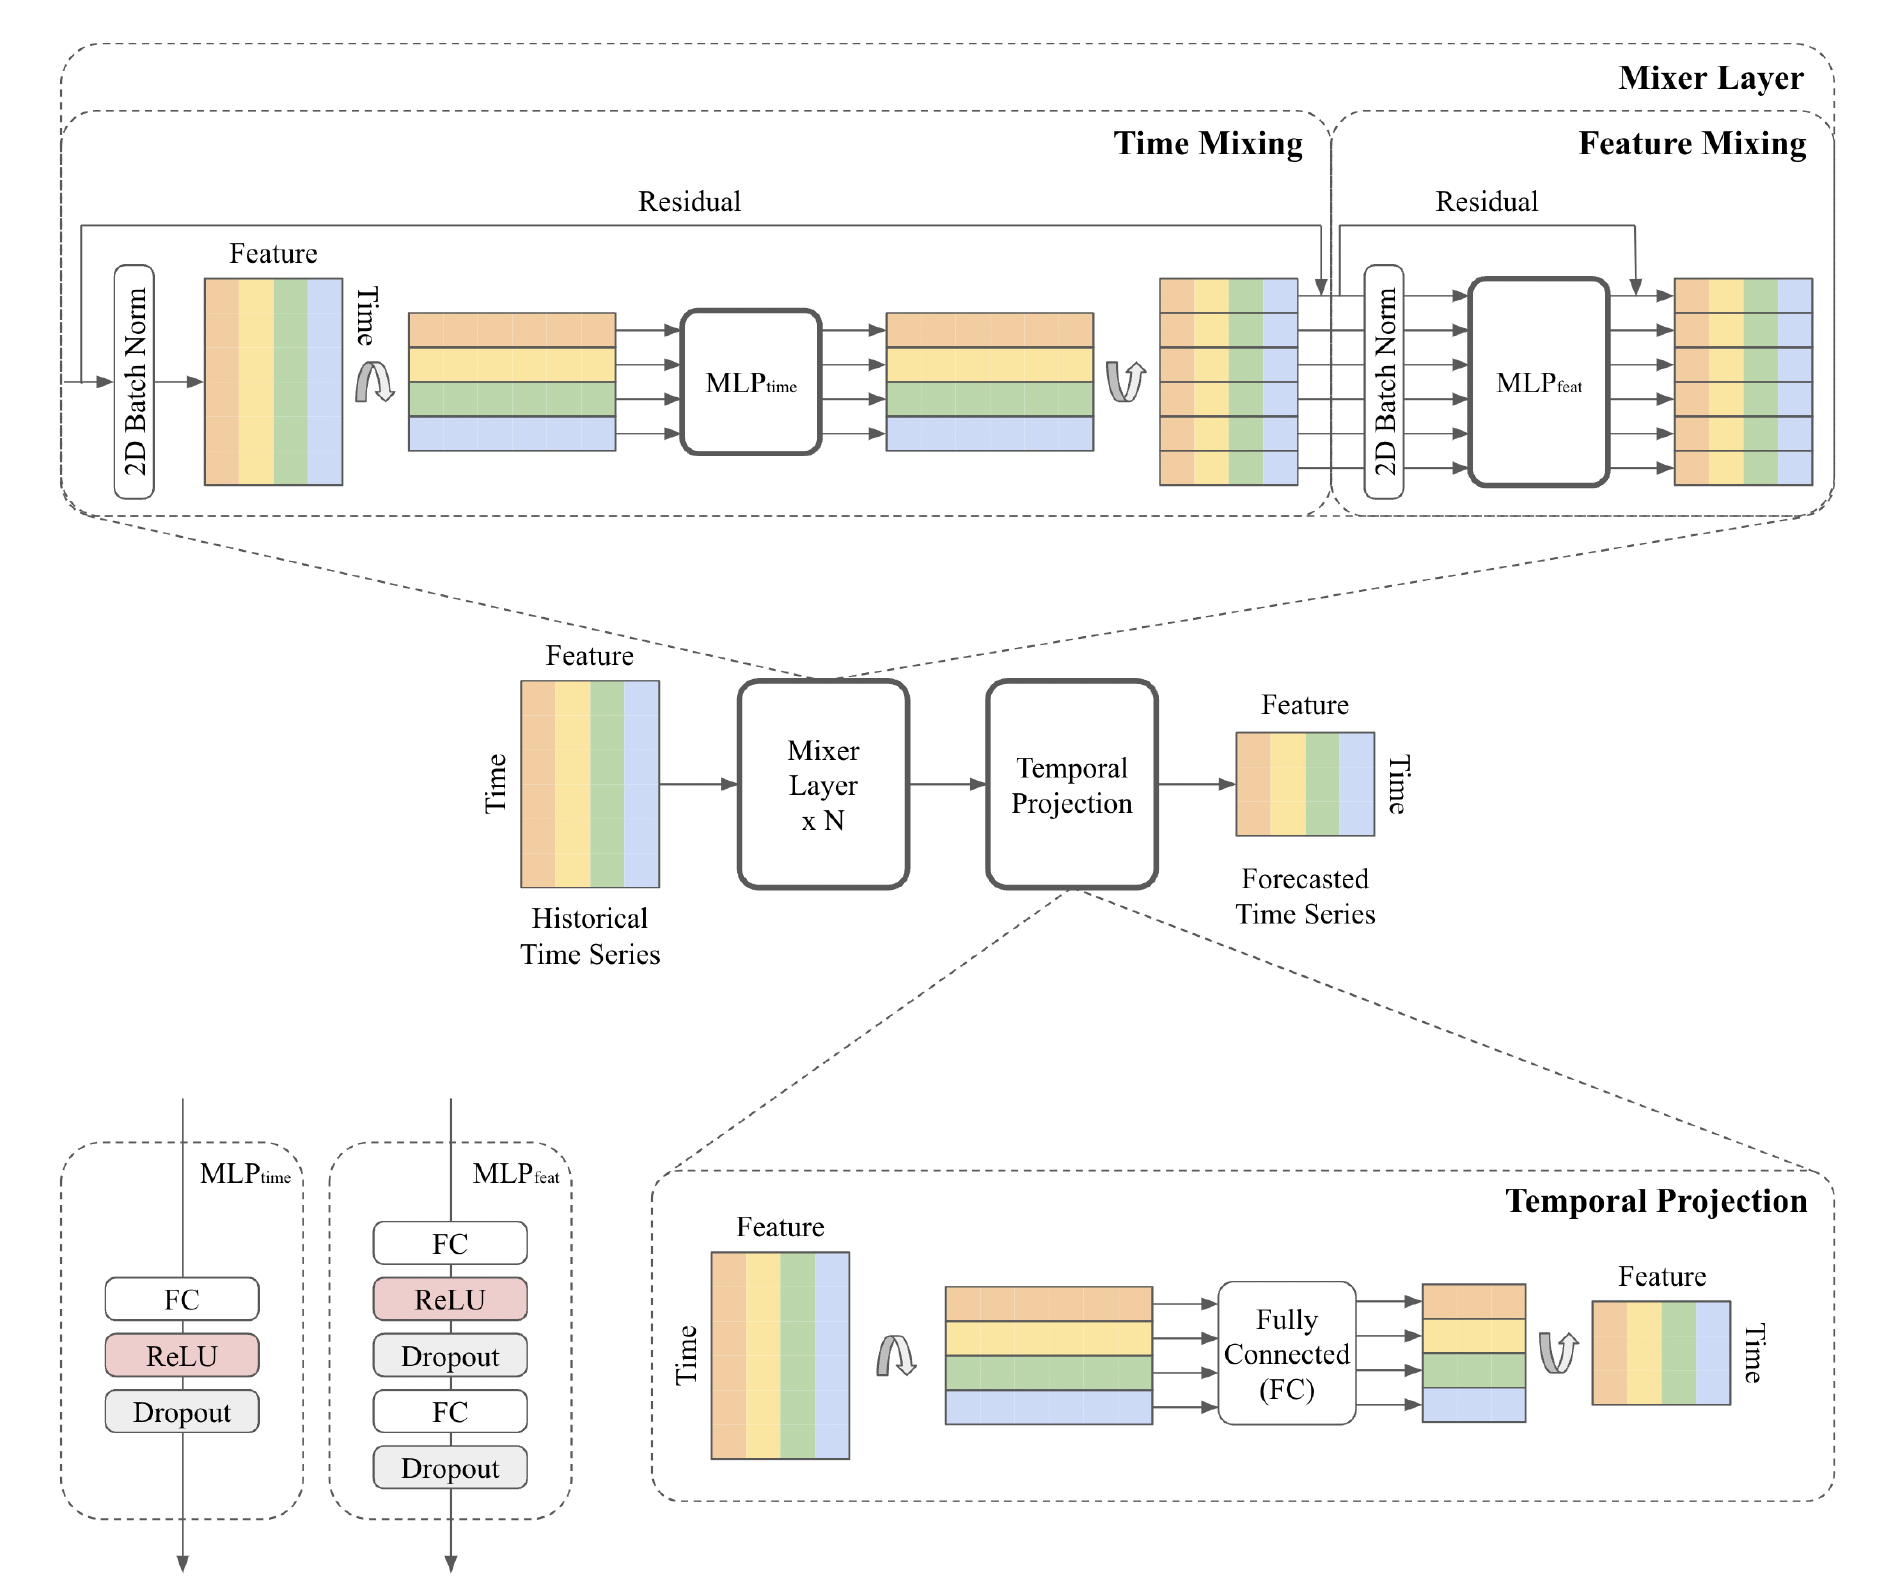



*Architecture of TSMixer. Image by S. Chen, C. Li, N. Yoder, S. Arik and T. Pfister from TSMixer: An All-MLP Architecture for Time Series Forecasting*

Since TSMixer is simply extending linear models, its architecture is fairly straightforward, since it is entirely MLP-based.

From the figure above, we can see that the model mainly consists of two steps: a mixer layer and a temporal projection.

We can see that for time mixing, the MLP consists of a fully connected layer, followed by the ReLU activation function, and a dropout layer.

The input, where rows represent time and columns represent features, is transposed so the MLP is applied on the time domain and shared across all features. This unit is responsible for learning temporal patterns.

Before leaving the time mixing unit, the matrix is transposed again, and it is sent to the feature mixing unit.

The feature mixing unit, then consists of two MLPs. Since it is applied in the feature domain, it is shared across all time steps. Here, there is no need to transpose, since the features are already on the horizontal axis.



The temporal projection step is what generates the predictions in TSMixer.Here, the matrix is again transposed and sent through a fully connected layer to generate predictions. The final step is then to transpose that matrix again to have the features on the horizontal axis, and the time steps on the vertical axis.

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

Unfortunately, we can not hide or show only results of training, that's why outputs look a little bit messy.

We connect to our google drive disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/AIDI Files/ML Programming/TSMixer'
os.chdir(folder_path)
os.listdir()

['README.md',
 'requirements.txt',
 'models',
 'dataset',
 'Original Datasets',
 'New Datasets',
 '__pycache__',
 'checkpoints',
 'run.py',
 'data_loader.py',
 'run_tuned_hparam.sh',
 'result.csv']

Check if our libraries have needed version

In [ ]:
!pip install -r requirements.txt

In [ ]:
!ls

checkpoints	dataset  __pycache__  requirements.txt	run.py
data_loader.py	models	 README.md    result.csv	run_tuned_hparam.sh


In [ ]:
!mkdir dataset
os.chdir("dataset")
# # Download zip file from [Google Drive](https://drive.google.com/corp/drive/folders/1ZOYpTUa82_jCcxIdTmyr0LXQfvaM9vIy) and put it under dataset/
!unzip all_six_datasets.zip
!mv all_six_datasets/*/*.csv ./

In [ ]:
os.chdir("..")

In [ ]:
!sh run_tuned_hparam.sh weather

+ data=weather
+ seq_len=512
+ pred_len=96
+ [ weather = ETTm2 ]
+ [ weather = weather ]
+ python run.py --model TSMixerRevIN --data weather --seq_len 512 --pred_len 96 --learning_rate 0.0001 --n_block 4 --dropout 0.3 --ff_dim 32
2023-12-12 21:42:25.704213: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 21:42:25.704273: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 21:42:25.704306: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 21:42:25.712224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use availabl

In [ ]:
!sh run_tuned_hparam.sh ETTm2

+ data=ETTm2
+ seq_len=512
+ pred_len=96
+ [ ETTm2 = ETTm2 ]
+ python run.py --model TSMixerRevIN --data ETTm2 --seq_len 512 --pred_len 96 --learning_rate 0.001 --n_block 2 --dropout 0.9 --ff_dim 64
2023-12-12 21:50:00.854661: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 21:50:00.854712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 21:50:00.854754: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 21:50:00.863395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performan

In [ ]:
!sh run_tuned_hparam.sh electricity

+ data=electricity
+ seq_len=512
+ pred_len=96
+ [ electricity = ETTm2 ]
+ [ electricity = weather ]
+ [ electricity = electricity ]
+ python run.py --model TSMixerRevIN --data electricity --seq_len 512 --pred_len 96 --learning_rate 0.0001 --n_block 4 --dropout 0.7 --ff_dim 64
2023-12-12 21:55:08.633009: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 21:55:08.633058: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 21:55:08.633094: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 21:55:08.640997: I tensorflow/core/platform/cpu_feature_guard.cc:182] Thi

In [ ]:
!sh run_tuned_hparam.sh traffic

+ data=traffic
+ seq_len=512
+ pred_len=96
+ [ traffic = ETTm2 ]
+ [ traffic = weather ]
+ [ traffic = electricity ]
+ [ traffic = traffic ]
+ python run.py --model TSMixerRevIN --data traffic --seq_len 512 --pred_len 96 --learning_rate 0.0001 --n_block 8 --dropout 0.7 --ff_dim 64
2023-12-12 22:29:03.822820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 22:29:03.822868: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 22:29:03.822918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 22:29:03.830846: I tensorflow/core/platform/cpu_feature_guard.cc:182]

In [ ]:
!sh run_tuned_hparam.sh exchange_rate

+ data=exchange_rate
+ seq_len=512
+ pred_len=96
+ [ exchange_rate = ETTm2 ]
+ [ exchange_rate = weather ]
+ [ exchange_rate = electricity ]
+ [ exchange_rate = traffic ]
+ [ exchange_rate = exchange_rate ]
+ python run.py --model TSMixerRevIN --data exchange_rate --seq_len 512 --pred_len 96 --learning_rate 0.0001 --n_block 2 --dropout 0.7 --ff_dim 64
2023-12-15 05:56:26.483050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 05:56:26.483103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 05:56:26.484535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 

In [ ]:
!sh run_tuned_hparam.sh clean_energy_dataset

+ data=clean_energy_dataset
+ seq_len=512
+ pred_len=96
+ [ clean_energy_dataset = ETTm2 ]
+ [ clean_energy_dataset = weather ]
+ [ clean_energy_dataset = electricity ]
+ [ clean_energy_dataset = traffic ]
+ [ clean_energy_dataset = exchange_rate ]
+ [ clean_energy_dataset = national_illness ]
+ [ clean_energy_dataset = clean_energy_dataset ]
+ python run.py --model TSMixerRevIN --data clean_energy_dataset --seq_len 512 --pred_len 96 --learning_rate 0.0001 --n_block 2 --dropout 0.7 --ff_dim 64
2023-12-15 05:57:47.702840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 05:57:47.702890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 05:57:47.704254: E external/local_xla/xla/stream_executor/cuda/cuda_b

# Conclusion

- In NLP or CV tasks transformer based models are in industry standard right now, but in TS field simple MLP models can outperform huge GPT like models. Also we trained TSMixer on T4 GPU by Colab, and it didn't take ages, we haven't tried, but I don't think we can train transformer based model till decent results.

- Results are great and they are totally the same, just like in research paper. Also results from new datasets seem pretty good.

- We also will make a fork on GitHub, because we fixed bugs, right now you can't run this model without fixing bugs in python code.

- We also learned how to work with GitHub.

# Future Direction
- Possible future improvements for TSMixer include enhancing interpretability to better understand what patterns it learns, exploring different mixing mechanisms like attention to selectively propagate signals, and improving scalability to even larger multivariate time series datasets.

- The simple TSMixer architecture also provides a strong foundation for incorporating inductive biases like monotonicity, convexity, or sparsity constraints. Evaluating TSMixer on a broader range of forecasting tasks and model variations would further demonstrate its capabilities and guide architectural refinements

References:

[1]: Yuqi Nie, Nam H. Nguyen, Phanwadee Sinthong, Jayant Kalagnanam
A Time Series is Worth 64 Words: Long-term Forcasting with Transformers, ICLR 2023, 03/2023

[2]: Bryan Lima, Sercan O. Arık, Nicolas Loeffb, Tomas Pfister, Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting, Elsevier 07/2020

[3]: Tian Zhou, Ziqing Ma, Qingsong Wen, Xue Wang, Liang Sun, Rong Jin, FEDformer: Frequency Enhanced Decomposed Transformer for Long-term Series Forecasting, International Conference on Machine Learning, 06/2022

[4]: Ilya Tolstikhin, Neil Houlsby, Alexander Kolesnikov, Lucas Beyer, Xiaohua Zhai, Thomas Unterthiner, Jessica Yung, Andreas Steiner, Daniel Keysers, Jakob Uszkoreit, Mario Lucic, Alexey Dosovitskiy, MLP-Mixer: An all-MLP Architecture for Vision, 06/2021

[5]: Si-An Chen, Chun-Liang Li, Nathanael C. Yoder, Sercan Ö. Arık, Tomas Pfister, TSMixer: An All-MLP Architecture for Time Series Forecasting,  Transactions on Machine Learning Research, 09/2023